## About the DataSet

This dataset provides comprehensive information for house price prediction, with 13 column names:
- Price: The price of the house.
- Area: The total area of the house in square feet.
- Bedrooms: The number of bedrooms in the house.
- Bathrooms: The number of bathrooms in the house.
- Stories: The number of stories in the house.
- Mainroad: Whether the house is connected to the main road (Yes/No).
- Guestroom: Whether the house has a guest room (Yes/No).--
- Basement: Whether the house has a basement (Yes/No).
- Hot water heating: Whether the house has a hot water heating system (Yes/No).
- Airconditioning: Whether the house has an air conditioning system (Yes/No).
- Parking: The number of parking spaces available within the house.
- Prefarea: Whether the house is located in a preferred area (Yes/No).
- Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).
- Kindly, upvote if you find the dataset interesting.

# importing data and other library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## performing basic checks

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.shape

(545, 13)

In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


from above data we came to know that
- the minimum area we have is 1650 sqft and max area we have is 16200 sqft
- with the above data the 50% population we have 4600sqft of area
- and we have min 1 bedroom in 1650 sqft and 6 bedroom with 16200sqft
- the min stories are 1 and max are 4 
- and for 50% of data we dont have parking  

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
for i in data.columns:
    x=data[i].value_counts()
    print(f'{i} = {len(x)}')

price = 219
area = 284
bedrooms = 6
bathrooms = 4
stories = 4
mainroad = 2
guestroom = 2
basement = 2
hotwaterheating = 2
airconditioning = 2
parking = 4
prefarea = 2
furnishingstatus = 3


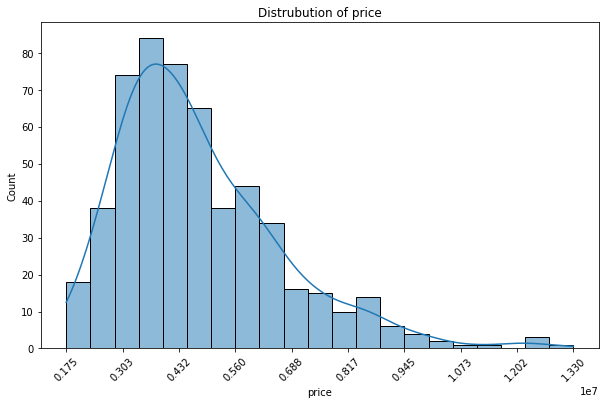

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'],kde=True)
plt.xticks(np.linspace(data.price.min(),data.price.max(), 10, dtype=int),rotation=45)
plt.title('Distrubution of price')
plt.show()

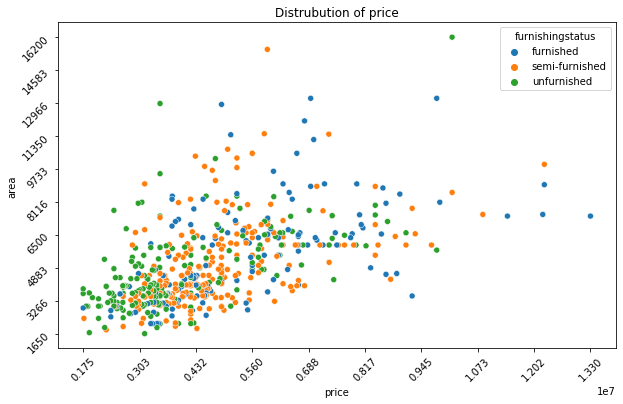

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='price',y='area',hue='furnishingstatus')
plt.xticks(np.linspace(data.price.min(),data.price.max(), 10, dtype=int),rotation=45)
plt.yticks(np.linspace(data.area.min(),data.area.max(), 10, dtype=int),rotation=45)
plt.title('Distrubution of price')
plt.show()

In [12]:
data.area.min()

1650

In [15]:
num_columns = data.select_dtypes(include=[int,float])
num_columns

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [16]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
num_columns = data.select_dtypes(include=[int,float]).columns
num_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [18]:
obj_columns = data.select_dtypes([object]).columns
obj_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [20]:
for i in data[obj_columns]:
    print(i ,'-------------\n',data[i]. value_counts())

mainroad -------------
 yes    468
no      77
Name: mainroad, dtype: int64
guestroom -------------
 no     448
yes     97
Name: guestroom, dtype: int64
basement -------------
 no     354
yes    191
Name: basement, dtype: int64
hotwaterheating -------------
 no     520
yes     25
Name: hotwaterheating, dtype: int64
airconditioning -------------
 no     373
yes    172
Name: airconditioning, dtype: int64
prefarea -------------
 no     417
yes    128
Name: prefarea, dtype: int64
furnishingstatus -------------
 semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


In [21]:
data.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [22]:
data.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [23]:
data.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [24]:
data.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [26]:
data.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [27]:
data.hotwaterheating.value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

In [28]:
data.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [29]:
obj_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [31]:
# # Replace categorical values with numeric values
# # also try label encoder
# obj_columns['mainroad'].replace(['yes', 'no'], [1, 0], inplace=True)
# # data1['guestroom'].replace(['yes', 'no'], [1, 0], inplace=True)
# # data1['basement'].replace(['yes', 'no'], [1, 0], inplace=True)
# # data1['hotwaterheating'].replace(['yes', 'no'], [1, 0], inplace=True)
# # data1['airconditioning'].replace(['yes', 'no'], [1, 0], inplace=True)
# # data1['prefarea'].replace(['yes', 'no'], [1, 0], inplace=True)
# # data1['furnishingstatus'].replace(['semi-furnished', 'unfurnished','furnished'], [1, 2, 3], inplace=True)

In [33]:
data[obj_columns]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [34]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Correlation Matrix & Heatmap¶
- To evaluate the relationships between different numerical variables, we compute a correlation matrix. - This matrix gives insights into the strength and direction of relationships among variables, identifying:

- Strong positive correlation: Values close to +1
- Strong negative correlation: Values close to -1
- No linear correlation: Values around 0

In [35]:
Correlation_Matrix = data.corr()
Correlation_Matrix 

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


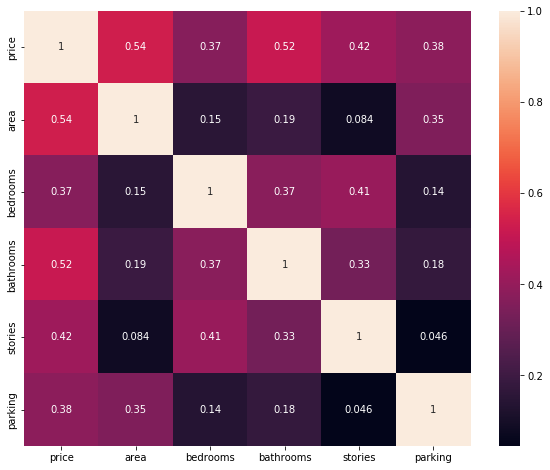

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(Correlation_Matrix , annot=True)
plt.show()

Summary of Correlation Analysis¶

   - area vs. price:
- Correlation: 0.54 (Strong positive correlation)
- Insight: The size of the house (area) is the most influential feature on the price. Larger houses tend to be more expensive.

   - bathrooms vs. price:
- Correlation: 0.52 (Moderate positive correlation)
- Insight: The number of bathrooms also has a significant impact on the price. More bathrooms typically - indicate a higher price, possibly due to the increased amenities and comfort.

   - bedrooms vs. price:
- Correlation: 0.37 (Moderate positive correlation)
- Insight: There is a moderate relationship between the number of bedrooms and the price. While more - - bedrooms can increase the value, the effect is less pronounced than with the area or number of bathrooms.

   - stories vs. price:
- Correlation: 0.42 (Weak to moderate positive correlation)
- Insight: The number of stories has a relatively weaker impact on the price. This may indicate that while multi-story homes can add value, it is not as strong a driver compared to size and amenities.

   - parking vs. price:
- Correlation: 0.38 (Weak positive correlation)
- Insight: The availability of parking spaces shows a weak relationship with the price. It suggests that while parking can be a desirable feature, it does not heavily influence the pricing in comparison to other factors like area or bathrooms.

    Key Takeaways:
- Strongest driver of house prices: Area (0.54)
- Significant impact: Number of bathrooms (0.52)
- Moderate impact: Number of bedrooms (0.37) and stories (0.42)
- Weakest impact: Parking spaces (0.38)

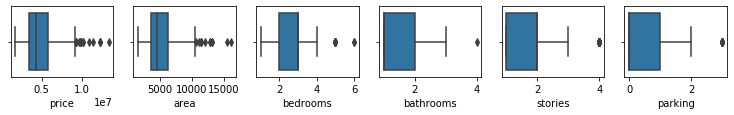

In [37]:
plt.figure(figsize=(12,20))
win_num = 1
for i in data[num_columns]:
    plt.subplot(13,7,win_num)
    sns.boxplot(x=i,data=data)
    win_num+=1
plt.tight_layout()

##🔻 Histogram

I noticed a strong correlation between price and number of bathrooms. To explore this relationship
further, I decided to create a histogram to visualize how price is distributed across different 
numbers of bathrooms. This allows us to better understand how the presence of additional bathrooms might
impact the price of a property



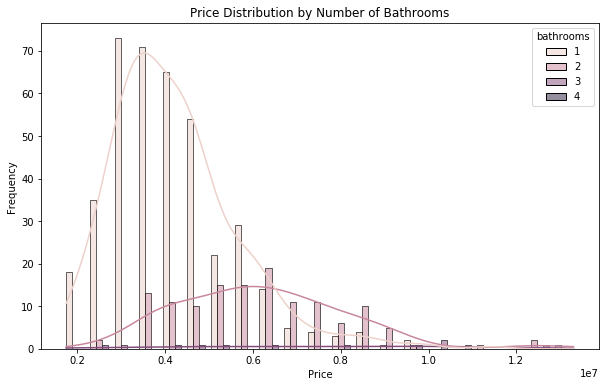

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data= data , x='price', hue='bathrooms', kde=True ,multiple='dodge')

# Add title and labels
plt.title('Price Distribution by Number of Bathrooms')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Analysis of the Graph:
"Price Distribution by Number of Bathrooms"

Most Common Price Range:

The graph shows that the most common price range is between 4 and 5 million dollars.
Most Common Number of Bathrooms:

The most common number of bathrooms is 2, followed by 3 and then 1.
Least Common Number of Bathrooms:

The least common number of bathrooms is 4.
Relationship Between Number of Bathrooms and Price:

The graph also shows that as the number of bathrooms increases, the price range increases as well.
This is likely because homes with more bathrooms are typically larger in size and offer more amenities.

## the average price of houses in preferred areas vs. non-preferred areas?

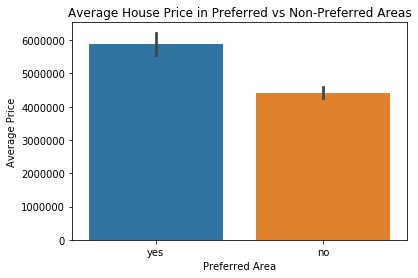

In [40]:
sns.barplot(x='prefarea', y='price', data= data, estimator='mean')
plt.title("Average House Price in Preferred vs Non-Preferred Areas")
plt.xlabel("Preferred Area")
plt.ylabel("Average Price")
plt.show()

 ## impact of the number of bedrooms on the house price?

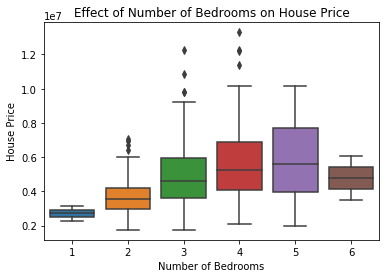

In [41]:
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title("Effect of Number of Bedrooms on House Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("House Price")
plt.show()

## the presence of air conditioning affect house prices?


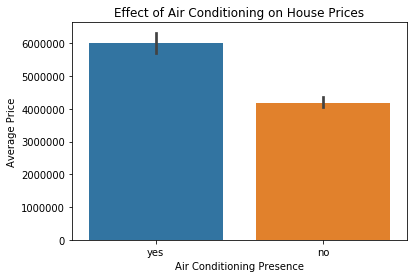

In [42]:
sns.barplot(x='airconditioning', y='price', data=data, estimator='mean')
plt.title("Effect of Air Conditioning on House Prices")
plt.xlabel("Air Conditioning Presence")
plt.ylabel("Average Price")
plt.show()

In [43]:
data.to_csv('Cleaned_housing_data.csv')